In [10]:
from classifier_manager import *
from dataset_manager import *
from metrics import *
import matplotlib.pyplot as plt
from roc_pr_tools import *
from plot_tools import *

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
def plotIdealClassifier():
    output=np.array([1, 1, 1, 0, 0])
    y_test=np.array([1, 1, 1, 0, 0])
    
    fpr, tpr = get_roc_curve(output, y_test)
    print("Area under ROC curve: ", get_auc(fpr, tpr))

    recalls, precisions = get_pr_curve(output, y_test)
    print("Area under PR curve: ", get_auc(recalls, precisions ))

    showPlots([{'data': tpr, 'x': fpr, 'label': "ROC"},
               {'data': precisions, 'x': recalls, 'label': "PR"}])

    show_plot()

def plotAllAgainstDataset(name):
    X_train, X_test, y_train, y_test = split_dataset(get_dataset(name))
    for classifier_name in classifier_names:
        print('Classifier: ', classifier_name)

        classifier = get_classifier(classifier_name)
        fit_classifier(classifier, X_train, y_train)

        output = predict_classifier(classifier, X_test)
        
        fpr, tpr = get_roc_curve(output, y_test)
        print("Area under ROC curve: ", get_auc(fpr, tpr))

        recalls, precisions = get_pr_curve(output, y_test)
        print("Area under PR curve: ", get_auc(recalls, precisions ))

        showPlots([{'data': tpr, 'x': fpr, 'label': "ROC"},
               {'data': precisions, 'x': recalls, 'label': "PR"}])

        show_plot()


Area under ROC curve:  1.0
Area under PR curve:  0.9


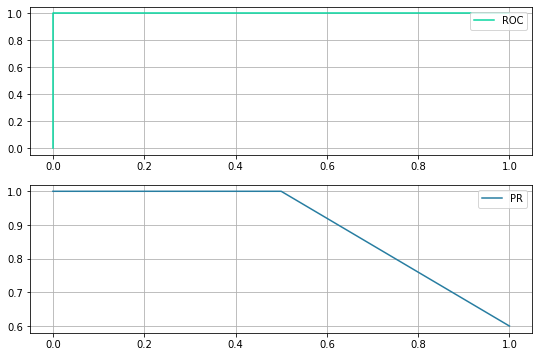

In [12]:
plt.rcParams['figure.figsize'] = [9, 6]
plotIdealClassifier()

Classifier:  Nearest Neighbors
Area under ROC curve:  0.9010149733695105
Area under PR curve:  0.8938320381431526


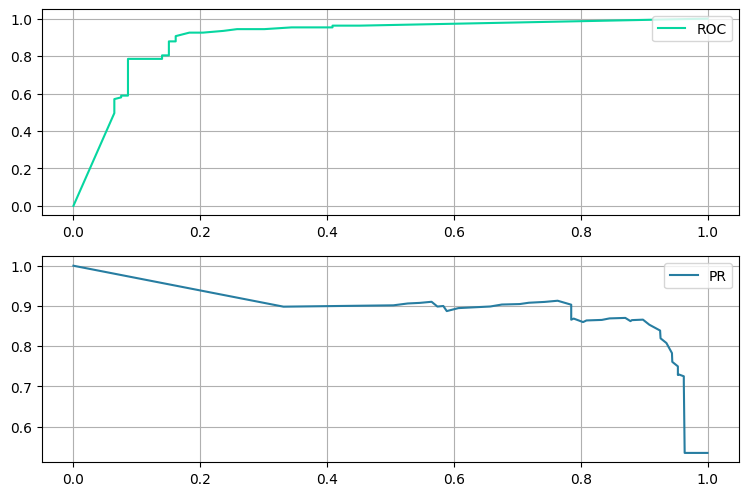

Classifier:  Linear SVM
Area under ROC curve:  0.9207114862827857
Area under PR curve:  0.9275759079447151


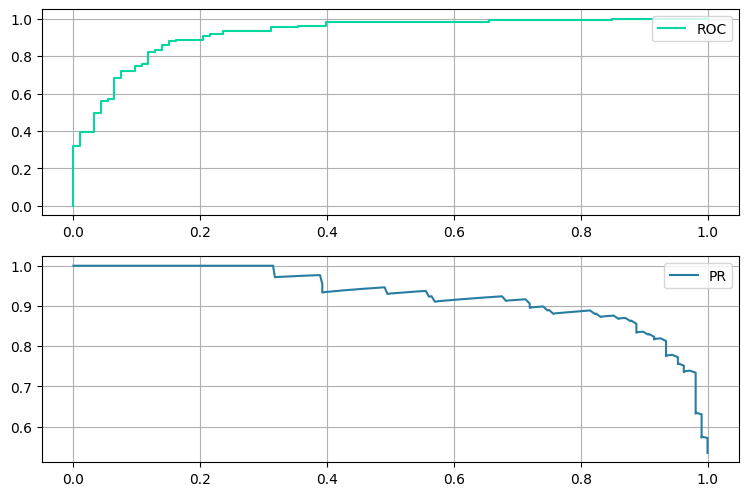

Classifier:  RBF SVM
Area under ROC curve:  0.9004120188925736
Area under PR curve:  0.8586635252192352


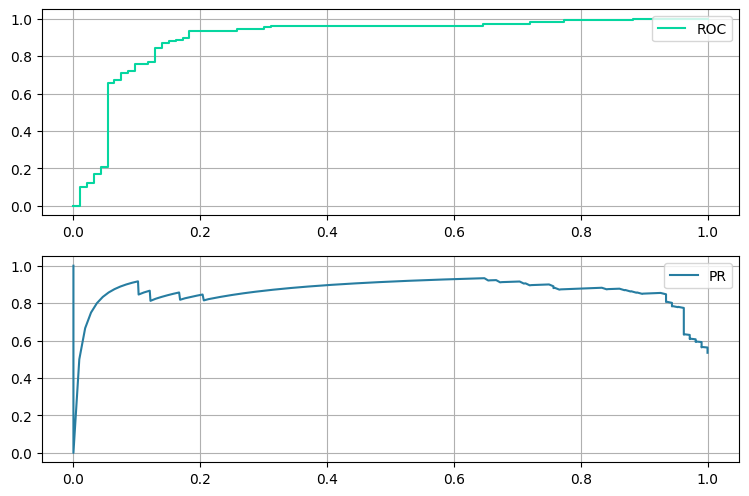

Classifier:  Gaussian Process
Area under ROC curve:  0.9252336448598131
Area under PR curve:  0.9313321854819732


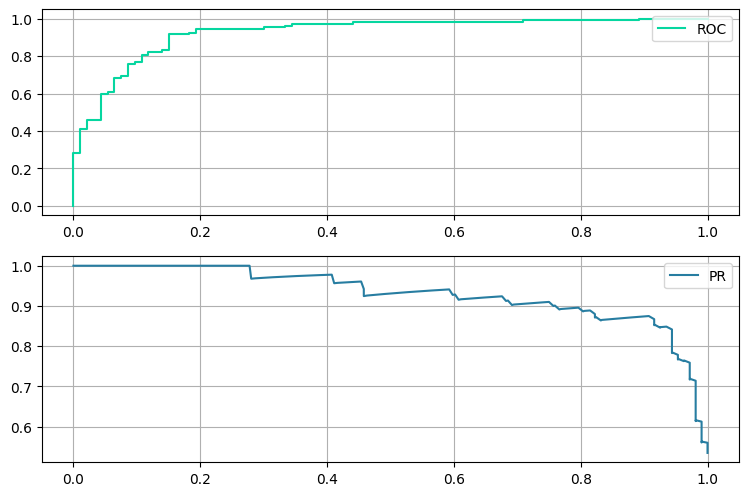

Classifier:  Decision Tree
Area under ROC curve:  0.9116671691287308
Area under PR curve:  0.9046637348968886


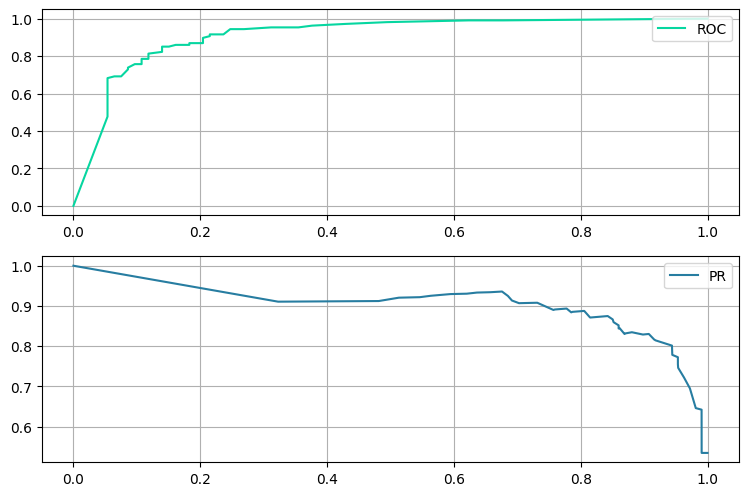

Classifier:  Random Forest
Area under ROC curve:  0.9246809365892874
Area under PR curve:  0.9121154095429944


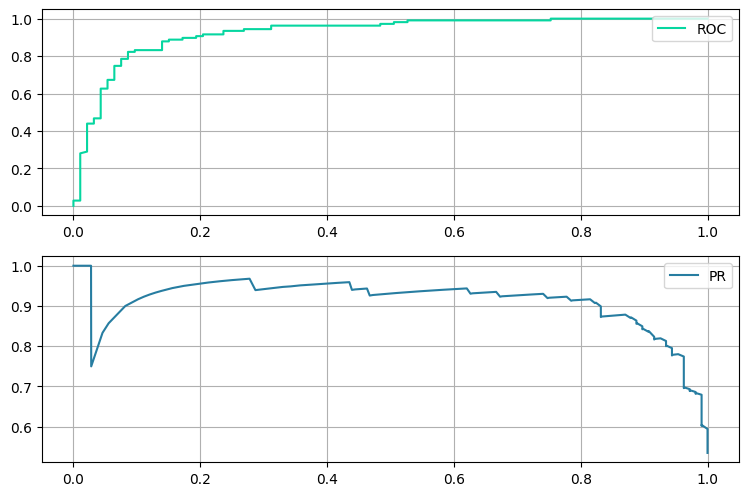

Classifier:  Neural Net
Area under ROC curve:  0.9253341372726358
Area under PR curve:  0.9313430342891023


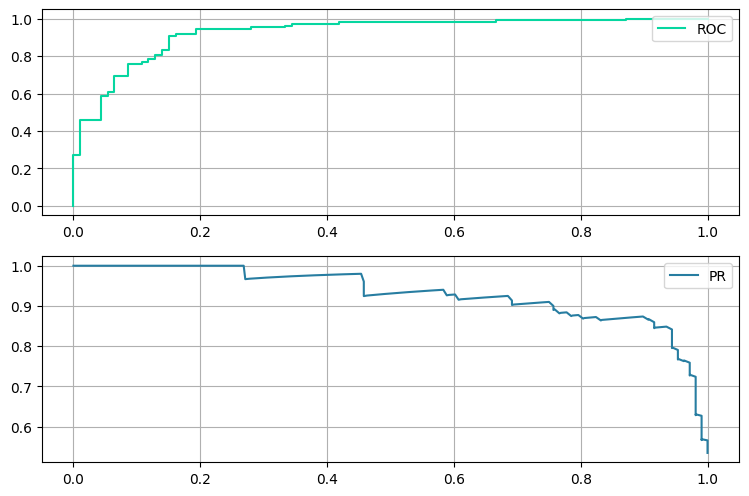

Classifier:  AdaBoost
Area under ROC curve:  0.9060395940106521
Area under PR curve:  0.9195690912360588


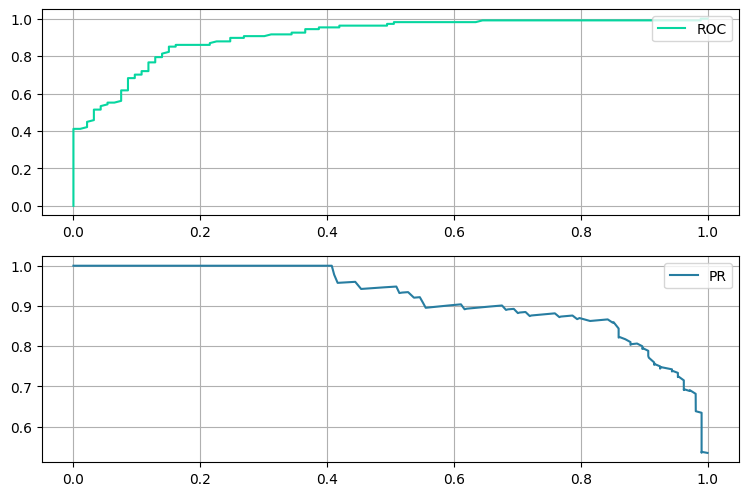

Classifier:  Naive Bayes
Area under ROC curve:  0.9112651994774394
Area under PR curve:  0.925643396915034


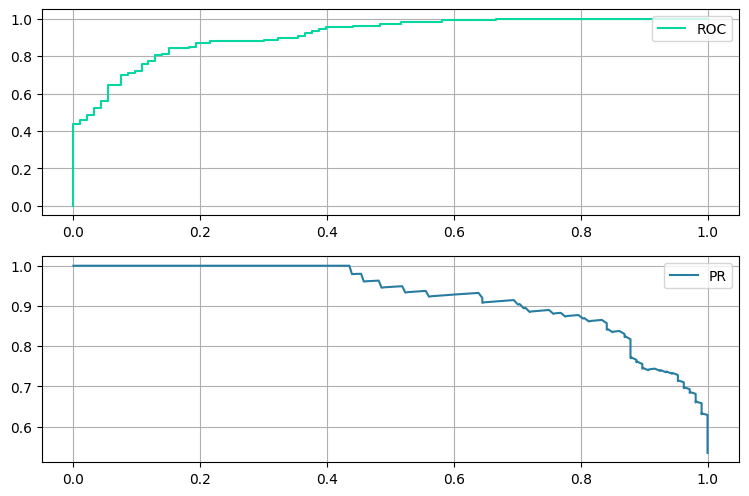

Classifier:  QDA
Area under ROC curve:  0.9271430007034467
Area under PR curve:  0.9341391104373273


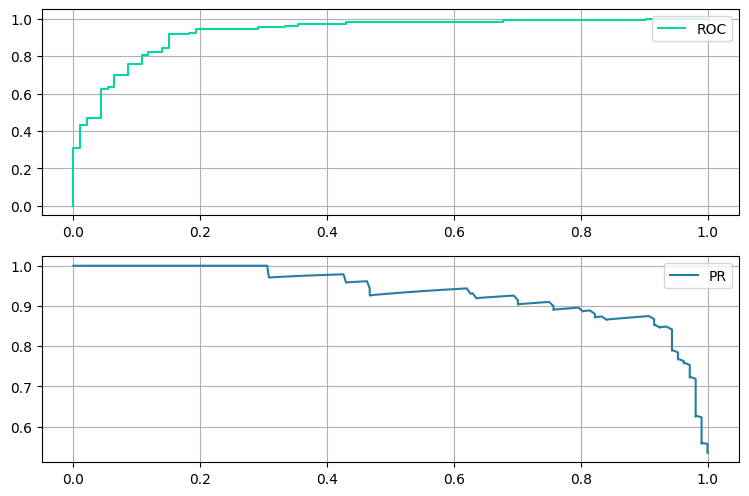

In [13]:
plt.rcParams['figure.figsize'] = [9, 6]
plt.rcParams['figure.dpi'] = 100

plotAllAgainstDataset("linear")

In [6]:
from sklearn import metrics
from classifier_manager import *
from dataset_manager import *

In [7]:
X_train, X_test, y_train, y_test = split_dataset(get_dataset('linear'))
classifier = get_classifier(classifier_names[1])
fit_classifier(classifier, X_train, y_train)
output = predict_classifier(classifier, X_test)

In [8]:
fpr_lib, tpr_lib, thresholds = metrics.roc_curve(y_test, output)
fpr, tpr = get_roc_curve(output, y_test)

Area under lib ROC curve:  0.9207114862827857
Area under ROC curve:  0.9207114862827857


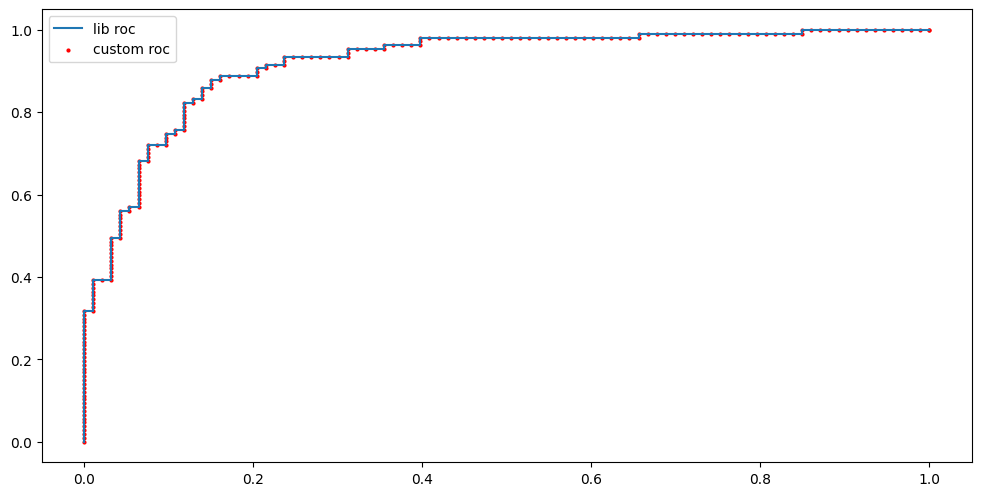

In [9]:
plt.rcParams['figure.figsize'] = [12, 6]

print("Area under lib ROC curve: ", get_auc(fpr_lib, tpr_lib))
print("Area under ROC curve: ", get_auc(fpr, tpr))

plt.plot(fpr_lib, tpr_lib, label = 'lib roc')
plt.scatter(fpr, tpr, s = 4, color = 'red', label = 'custom roc')

plt.legend()
plt.show()